In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline

import csv
from os import path
from pathlib import Path

root_dir = Path().absolute()

In [2]:
pd.read_csv('../data/accre_jobs_cleaned.csv')

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,...,exitcode_error,used_mb_per_node,used_mb_per_core,reqmem_mc,reqmem_mn,reqmem_mn_per_core,reqmem_per_core,cluster_type_and_nodes,cluster_type,cluster_nodes
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,...,0,65973.49,2748.895417,NaN,122880.0,5120.0,5120.0,"('cn', '1531')",cn,1531
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,...,0,67181.12,2799.213333,NaN,122880.0,5120.0,5120.0,"('cn', '1441')",cn,1441
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,...,0,69111.86,2879.660833,NaN,122880.0,5120.0,5120.0,"('cn', '1464')",cn,1464
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,...,0,65317.33,2721.555417,NaN,122880.0,5120.0,5120.0,"('cn', '1473')",cn,1473
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,...,0,65876.11,2744.837917,NaN,122880.0,5120.0,5120.0,"('cn', '1440')",cn,1440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813177,24173815_6,portabella,vennie,32768Mn,23269.08M,1-00:00:00,00:01:36,1,2,production,...,0,23269.08,11634.540000,NaN,32768.0,16384.0,16384.0,"('cn', '432')",cn,432
3813178,24173815_7,portabella,vennie,32768Mn,20879.81M,1-00:00:00,00:01:37,1,2,production,...,0,20879.81,10439.905000,NaN,32768.0,16384.0,16384.0,"('cn', '440')",cn,440
3813179,24173815_8,portabella,vennie,32768Mn,30042.68M,1-00:00:00,00:02:27,1,2,production,...,0,30042.68,15021.340000,NaN,32768.0,16384.0,16384.0,"('cn', '312')",cn,312
3813180,24173815_9,portabella,vennie,32768Mn,31067.75M,1-00:00:00,00:02:27,1,2,production,...,0,31067.75,15533.875000,NaN,32768.0,16384.0,16384.0,"('cn', '312')",cn,312


In [3]:
accre_jobs_cleaned = pd.read_csv('../data/accre_jobs_cleaned.csv')
accre_jobs_cleaned

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,...,exitcode_error,used_mb_per_node,used_mb_per_core,reqmem_mc,reqmem_mn,reqmem_mn_per_core,reqmem_per_core,cluster_type_and_nodes,cluster_type,cluster_nodes
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,...,0,65973.49,2748.895417,NaN,122880.0,5120.0,5120.0,"('cn', '1531')",cn,1531
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,...,0,67181.12,2799.213333,NaN,122880.0,5120.0,5120.0,"('cn', '1441')",cn,1441
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,...,0,69111.86,2879.660833,NaN,122880.0,5120.0,5120.0,"('cn', '1464')",cn,1464
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,...,0,65317.33,2721.555417,NaN,122880.0,5120.0,5120.0,"('cn', '1473')",cn,1473
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,...,0,65876.11,2744.837917,NaN,122880.0,5120.0,5120.0,"('cn', '1440')",cn,1440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813177,24173815_6,portabella,vennie,32768Mn,23269.08M,1-00:00:00,00:01:36,1,2,production,...,0,23269.08,11634.540000,NaN,32768.0,16384.0,16384.0,"('cn', '432')",cn,432
3813178,24173815_7,portabella,vennie,32768Mn,20879.81M,1-00:00:00,00:01:37,1,2,production,...,0,20879.81,10439.905000,NaN,32768.0,16384.0,16384.0,"('cn', '440')",cn,440
3813179,24173815_8,portabella,vennie,32768Mn,30042.68M,1-00:00:00,00:02:27,1,2,production,...,0,30042.68,15021.340000,NaN,32768.0,16384.0,16384.0,"('cn', '312')",cn,312
3813180,24173815_9,portabella,vennie,32768Mn,31067.75M,1-00:00:00,00:02:27,1,2,production,...,0,31067.75,15533.875000,NaN,32768.0,16384.0,16384.0,"('cn', '312')",cn,312


In [7]:
accre_jobs_cleaned.shape

(3813182, 24)

.goupby('account')['user'].value_counts()

In [17]:
cms_jobs = accre_jobs_cleaned[accre_jobs_cleaned['account'].str.contains('cms')]
cms_jobs

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,...,exitcode_error,used_mb_per_node,used_mb_per_core,reqmem_mc,reqmem_mn,reqmem_mn_per_core,reqmem_per_core,cluster_type_and_nodes,cluster_type,cluster_nodes
2125,17032244,cms,cmspilot,28000Mn,8320.07M,2-00:00:00,1-23:31:46,1,4,production,...,0,8320.07,2080.0175,NaN,28000.0,7000.000,7000.000,"('cn', '1205')",cn,1205
2126,17032568,cms,cmspilot,28000Mn,11954.84M,2-00:00:00,1-23:33:13,1,4,production,...,0,11954.84,2988.7100,NaN,28000.0,7000.000,7000.000,"('cn', '1492')",cn,1492
2127,17032569,cms,cmspilot,28000Mn,10498.84M,2-00:00:00,1-23:36:36,1,4,production,...,0,10498.84,2624.7100,NaN,28000.0,7000.000,7000.000,"('cn', '1497')",cn,1497
2128,17032916,cms,cmspilot,21875Mn,11728.02M,2-00:00:00,1-23:27:55,1,8,nogpfs,...,0,11728.02,1466.0025,NaN,21875.0,2734.375,2734.375,"('ng', '1037')",ng,1037
2129,17032920,cms,cmspilot,94451Mn,20659.08M,2-00:00:00,1-23:16:04,1,8,nogpfs,...,0,20659.08,2582.3850,NaN,94451.0,11806.375,11806.375,"('ng', '691')",ng,691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813137,24173661,cmsadmin,autocms,4096Mc,860.03M,12:00:00,00:03:50,1,1,production,...,0,860.03,860.0300,4096.0,NaN,4096.000,4096.000,"('cn', '394')",cn,394
3813138,24173686,cmsadmin,lcgadmin,2000Mn,0.09M,2-00:00:00,00:02:29,1,1,sam,...,0,0.09,0.0900,NaN,2000.0,2000.000,2000.000,"('generic', 'vm-cms-sam-pri')",generic,vm-cms-sam-pri
3813149,24173689,cmsadmin,lcgadmin,2000Mn,0.09M,2-00:00:00,00:02:11,1,1,sam,...,0,0.09,0.0900,NaN,2000.0,2000.000,2000.000,"('generic', 'vm-cms-sam-sec')",generic,vm-cms-sam-sec
3813150,24173711,cmsadmin,lcgadmin,2000Mn,0.09M,2-00:00:00,00:01:29,1,1,sam,...,0,0.09,0.0900,NaN,2000.0,2000.000,2000.000,"('generic', 'vm-cms-sam-pri')",generic,vm-cms-sam-pri


In [18]:
cms_jobs['account'].value_counts()

cms            806456
cms_lowprio    135682
cmsadmin       102589
cms_gpu_acc      1196
Name: account, dtype: int64

In [19]:
cms_jobs['user'].value_counts()

cmslocal      491240
cmspilot      344710
lcgadmin       84758
uscmslocal     45691
c19pilot       45688
autocms        23438
tamekia         6813
erick           1816
meghann          602
lailah           410
magen            400
tomasa           216
lavern            60
tremaine          51
benjamine         25
clemens            2
vannie             2
minor              1
Name: user, dtype: int64

cms_auto = cms_jobs[~cms_jobs['user'].str.contains('us')]
cms_auto = cms_jobs[~cms_jobs['user'].str.contains('c19')]
cms_auto['user'].value_counts()

In [59]:
cms_auto = cms_jobs[(cms_jobs['user'] == 'cmslocal') | (cms_jobs['user'] == 'cmspilot')]
cms_auto['user'].value_counts()

cmslocal    491240
cmspilot    344710
Name: user, dtype: int64

In [60]:
cms_auto = cms_auto[['reqtime','usedtime','reqmem_mn','used_mb_per_node','cluster_type','cluster_nodes','nodes','exitcode_error','state']]
cms_auto

,reqtime,usedtime,reqmem_mn,used_mb_per_node,cluster_type,cluster_nodes,nodes,exitcode_error,state
2125,2-00:00:00,1-23:31:46,28000.0,8320.07,cn,1205,1,0,COMPLETED
2126,2-00:00:00,1-23:33:13,28000.0,11954.84,cn,1492,1,0,COMPLETED
2127,2-00:00:00,1-23:36:36,28000.0,10498.84,cn,1497,1,0,COMPLETED
2128,2-00:00:00,1-23:27:55,21875.0,11728.02,ng,1037,1,0,COMPLETED
2129,2-00:00:00,1-23:16:04,94451.0,20659.08,ng,691,1,0,COMPLETED
...,...,...,...,...,...,...,...,...,...
3812800,2-00:00:00,00:01:26,28000.0,20.39,cn,1471,1,0,COMPLETED
3812801,2-00:00:00,00:01:19,28000.0,6.24,cn,1471,1,0,COMPLETED
3812802,2-00:00:00,00:01:19,28000.0,6.23,cn,1534,1,0,COMPLETED
3812856,2-00:00:00,00:01:00,21875.0,6.23,ng,1080,1,0,COMPLETED


In [63]:
cms_jobs['exitcode_error'].value_counts()

0      1045878
9           44
125          1
Name: exitcode_error, dtype: int64

In [66]:
cms_auto['nodes'].value_counts()

1    835950
Name: nodes, dtype: int64

sns.scatterplot(data = cms_auto, x = '', y = '', hue = '');
plt.xlabel('', size = 14)
plt.ylabel('', size = 14)
plt.title('', size=18);

In [71]:
cms_auto_sample1000 = cms_auto.sample(n=1000)

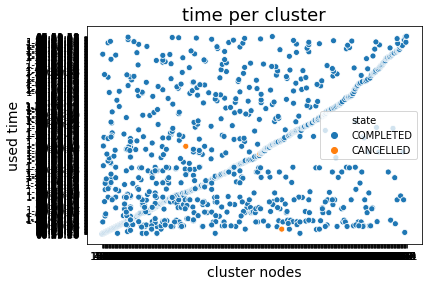

In [72]:
sns.scatterplot(data = cms_auto_sample1000, x = 'cluster_nodes', y = 'usedtime', hue = 'state');
plt.xlabel('cluster nodes', size = 14)
plt.ylabel('used time', size = 14)
plt.title('time per cluster', size=18);

In [73]:
cms_auto_10hr_sample1000 = cms_auto[~cms_auto['usedtime'].str.contains('-')]
cms_auto_10hr_sample1000 = cms_auto_10hr_sample1000[cms_auto_10hr_sample1000['usedtime'].str.contains('0?.??.??')].sample(n=1000)
cms_auto_10hr_sample1000

,reqtime,usedtime,reqmem_mn,used_mb_per_node,cluster_type,cluster_nodes,nodes,exitcode_error,state
3763487,2-00:00:00,02:06:42,28000.0,8047.59,cn,1210,1,0,COMPLETED
3384277,2-00:00:00,01:33:48,28000.0,7511.77,cn,441,1,0,COMPLETED
432123,2-00:00:00,00:20:38,38007.0,1.84,ng,512,1,0,COMPLETED
3457546,2-00:00:00,00:00:22,46071.0,0.00,ng,518,1,0,COMPLETED
3773938,2-00:00:00,00:11:43,5000.0,2310.08,cn,1276,1,0,COMPLETED
...,...,...,...,...,...,...,...,...,...
158688,2-00:00:00,00:53:27,28000.0,10152.39,cn,1209,1,0,COMPLETED
3467224,2-00:00:00,00:20:04,28000.0,6.24,cn,386,1,0,COMPLETED
3716047,2-00:00:00,00:20:04,21880.0,6.23,ng,513,1,0,COMPLETED
2153760,2-00:00:00,00:00:04,5000.0,0.00,cn,1453,1,0,CANCELLED


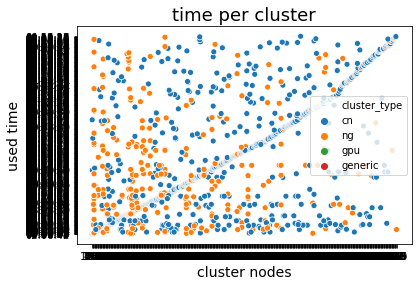

In [75]:
sns.scatterplot(data = cms_auto_10hr_sample1000, x = 'cluster_nodes', y = 'usedtime', hue = 'cluster_type');
plt.xlabel('cluster nodes', size = 14)
plt.ylabel('used time', size = 14)
plt.title('time per cluster', size=18);

In [76]:
cms_auto_1hr_sample1000 = cms_auto[~cms_auto['usedtime'].str.contains('-')]
cms_auto_1hr_sample1000 = cms_auto_1hr_sample1000[cms_auto_1hr_sample1000['usedtime'].str.contains('00.??.??')].sample(n=1000)
cms_auto_1hr_sample1000

,reqtime,usedtime,reqmem_mn,used_mb_per_node,cluster_type,cluster_nodes,nodes,exitcode_error,state
2970399,2-00:00:00,00:20:00,21875.0,0.79,ng,1023,1,0,COMPLETED
3403374,2-00:00:00,00:01:00,5000.0,0.00,cn,466,1,0,COMPLETED
3422976,2-00:00:00,00:20:10,28000.0,6.24,cn,419,1,0,COMPLETED
732156,2-00:00:00,00:00:05,28000.0,0.00,cn,453,1,0,COMPLETED
3126967,2-00:00:00,00:20:02,62193.0,0.78,ng,1107,1,0,COMPLETED
...,...,...,...,...,...,...,...,...,...
3424664,2-00:00:00,00:20:08,28000.0,6.23,cn,1299,1,0,COMPLETED
634718,00:30:00,00:30:20,NaN,1020.95,cn,1389,1,0,COMPLETED
3788151,2-00:00:00,00:41:21,28000.0,7443.66,cn,1362,1,0,COMPLETED
3409294,2-00:00:00,00:20:06,28000.0,6.24,cn,1450,1,0,COMPLETED


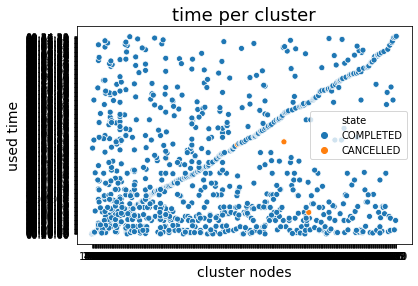

In [77]:
sns.scatterplot(data = cms_auto_1hr_sample1000, x = 'cluster_nodes', y = 'usedtime', hue = 'state');
plt.xlabel('cluster nodes', size = 14)
plt.ylabel('used time', size = 14)
plt.title('time per cluster', size=18);

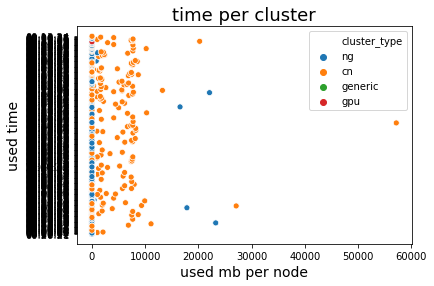

In [55]:
sns.scatterplot(data = cms_auto_1hr_sample1000, x = 'used_mb_per_node', y = 'usedtime', hue = 'cluster_type');
plt.xlabel('used mb per node', size = 14)
plt.ylabel('used time', size = 14)
plt.title('used time per used mem', size=18);

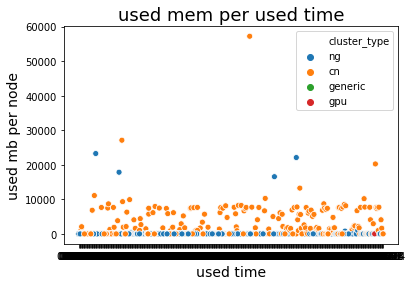

In [57]:
sns.scatterplot(data = cms_auto_1hr_sample1000, x = 'usedtime', y = 'used_mb_per_node', hue = 'cluster_type');
plt.xlabel('used time', size = 14)
plt.ylabel('used mb per node', size = 14)
plt.title('used mem per used time', size=18);

In [80]:
cms_auto_failed = cms_auto[cms_auto['state'] == 'FAILED']
cms_auto_failed

,reqtime,usedtime,reqmem_mn,used_mb_per_node,cluster_type,cluster_nodes,nodes,exitcode_error,state
8629,2-00:00:00,00:01:11,186648.0,1.78,cn,1554,1,0,FAILED
8632,2-00:00:00,00:01:26,186648.0,8.38,cn,1544,1,0,FAILED
22234,2-00:00:00,00:02:35,21875.0,11310.72,ng,909,1,0,FAILED
197972,2-00:00:00,00:01:32,186648.0,1.82,cn,1581,1,0,FAILED
197973,2-00:00:00,00:01:53,186648.0,1.79,cn,1563,1,0,FAILED
...,...,...,...,...,...,...,...,...,...
2194734,2-00:00:00,00:01:05,28000.0,6420.60,cn,1536,1,0,FAILED
2505543,2-00:00:00,00:01:55,28000.0,12175.01,cn,1523,1,0,FAILED
2505544,2-00:00:00,00:01:56,28000.0,14505.71,cn,1523,1,0,FAILED
3259530,2-00:00:00,00:01:07,21878.0,14938.52,ng,739,1,0,FAILED


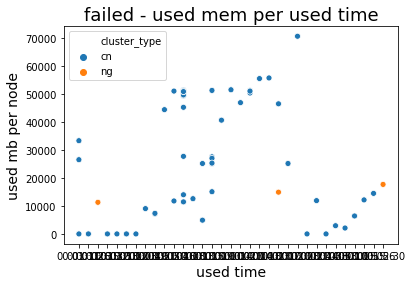

In [83]:
sns.scatterplot(data = cms_auto_failed, x = 'usedtime', y = 'used_mb_per_node', hue = 'cluster_type');
plt.xlabel('used time', size = 14)
plt.ylabel('used mb per node', size = 14)
plt.title('failed - used mem per used time', size=18);